In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv("haberman.csv")


In [128]:
#Objective - Objective of EDA on Haberman Dataset should be as follows-
#1.Understand the basics of the data (features, rows, min, max, std deviation etc.)
#2.Distribution of the features
#3.From the distribution and 2D plots, try to find if there is any visibile relation between any feature and the status i.e. is there any
#threshold value of a particular feature that can be used as an indicator of whether patient will survive 5 years after the surgery
#4.Explore the data to find out if there is any obvious data descripancy or anything which is contradictory to domain knowledge

In [129]:
#Understanding columns and first 5 rows
print(df.head(5))

   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


In [130]:
#Understanding number of columns and rows
#There are 306 records and 4 columns (3 features and 1 label)
print(df.shape)

(306, 4)


In [131]:
#Understanding basic statistical parameters of all columns.

print(df.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [132]:
#Median of nodes
df['nodes'].median()

1.0

In [133]:
#Median of age
df['age'].median()

52.0

In [134]:
#Understanding Quantiles
print("\nQuantiles:")
print(np.percentile(df["age"],np.arange(25, 125, 25)))
print(np.percentile(df["nodes"],np.arange(25, 125, 25)))
print(np.percentile(df["year"], np.arange(25, 125, 25)))


Quantiles:
[44.   52.   60.75 83.  ]
[ 0.  1.  4. 52.]
[60.   63.   65.75 69.  ]


In [135]:
#Finding Median Absolute Deviation of Nodes and Ages of Patients who survived in 5 years and patients who did not survive in 5 years

df_Survived =df.loc[df["status"] == 1]
df_notSurvived = df.loc[df["status"] == 2]

print ("\nMedian Absolute Deviation")
print("Median Absolute Deviation of nodes of Survived patients", robust.mad(df_Survived["nodes"]))
print("Standard Deviation of nodes of Survived patients",df_Survived["nodes"].std())
print("Median Absolute Deviation of age of Survived patients", robust.mad(df_Survived["age"]))
print("Median Absolute Deviation of nodes Patients not survived in 5 years",robust.mad(df_notSurvived["nodes"]))
print("Median Absolute Deviation of age Patients not survived in 5 years",robust.mad(df_notSurvived["age"]))





Median Absolute Deviation
Median Absolute Deviation of nodes of Survived patients 0.0
Standard Deviation of nodes of Survived patients 5.870318127719728
Median Absolute Deviation of age of Survived patients 13.343419966550417
Median Absolute Deviation of nodes Patients not survived in 5 years 5.930408874022408
Median Absolute Deviation of age Patients not survived in 5 years 11.860817748044816


In [136]:
#Finding class values

print(df["status"].value_counts())

1    225
2     81
Name: status, dtype: int64


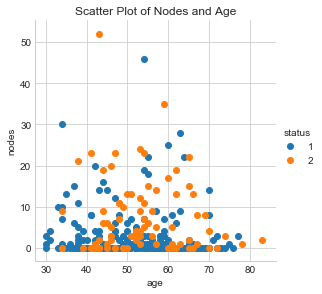

In [137]:
#Shows that there are only 2-3 orange records of age less than 35. Even for high number of nodes survival rate is better patinet 
#of age upto 35
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("Scatter Plot of Nodes and Age")
plt.show();

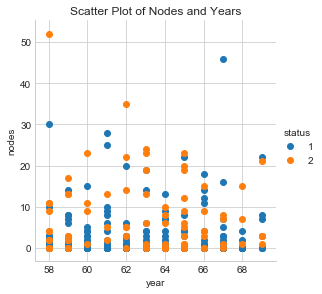

In [138]:
#Trying to find whether for the given number of nodes if the year of surgery is more (probably showing better technology)
#survival rate is better or not. 

sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", size=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("Scatter Plot of Nodes and Years")  
plt.show();

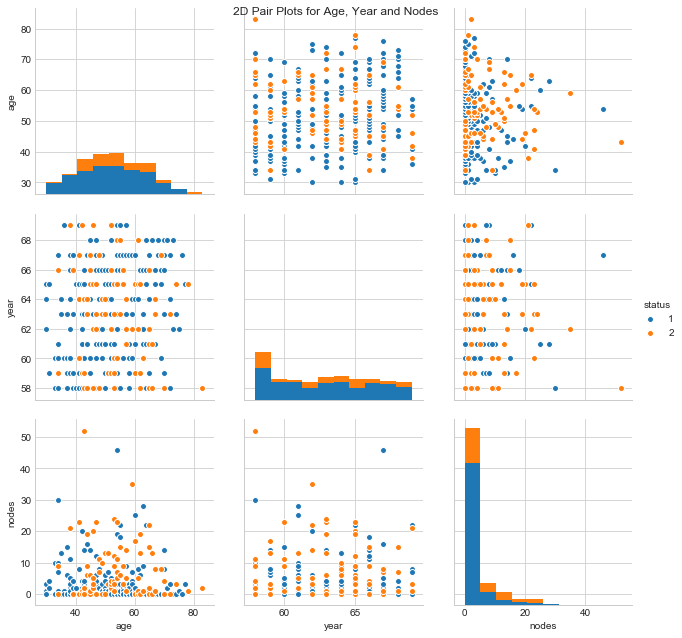

In [139]:
#2D Pair Plot to find out if there is any relationship among age, year and nodes


plt.close();
sns.set_style("whitegrid");
g =sns.pairplot(df, hue="status", size=3, vars=["age", "year", "nodes"])
g.fig.suptitle("2D Pair Plots for Age, Year and Nodes")
plt.show()


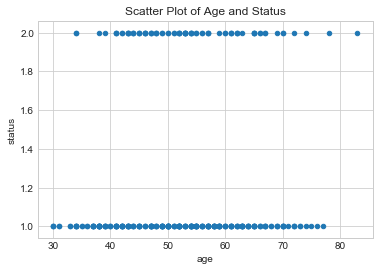

In [140]:
df.plot(kind='scatter', x='age', y='status') ;
plt.title("Scatter Plot of Age and Status")
plt.show()

In [141]:
df[(df['age']<40) & (df['status'] == 2)]

,age,year,nodes,status
7,34,59,0,2
8,34,66,9,2
24,38,69,21,2
34,39,66,0,2


In [142]:
#Trying to find if there are any patients with zero nodes but still not survived after 5 years
df[(df['nodes']==0) & (df['status']==2)].count()

age       19
year      19
nodes     19
status    19
dtype: int64

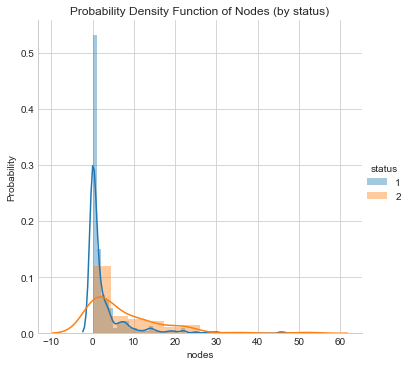

In [143]:
#PDF of nodes based on status to find out how effective is the node variable in order to predict the status
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("Probability Density Function of Nodes (by status)")
plt.ylabel("Probability")
plt.show();

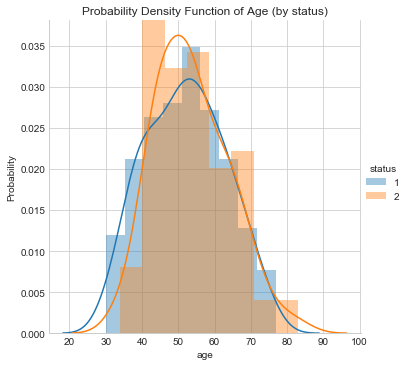

In [144]:
#PDF of age based on status to find out how effective is the age variable in order to predict the status
sns.FacetGrid(df, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Probability Density Function of Age (by status)")
plt.ylabel("Probability")
plt.show();

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


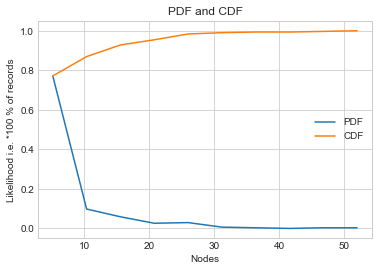

In [145]:
#PDF(Blue) and CDF(orange)
counts, bin_edges = np.histogram(df['nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "PDF")
plt.plot(bin_edges[1:], cdf,label = "CDF")
plt.grid(True)
plt.legend(loc='right')
plt.title('PDF and CDF')
plt.xlabel('Nodes')
plt.ylabel('Likelihood i.e. *100 % of records')

plt.show()


In [146]:
#Verification of CDF interpretation, 301 recrods have upto 25 nodes.
df[(df['nodes'] <=25)].count()

age       301
year      301
nodes     301
status    301
dtype: int64

In [147]:
#Verification of CDF interpretation, no records have nodes more than 52
df[(df['nodes'] > 52)].count()

age       0
year      0
nodes     0
status    0
dtype: int64

In [148]:
#Verification of PDF interpretation, around 77% of the records have upto 5 nodes
df[(df['nodes'] <=5)].count()

age       236
year      236
nodes     236
status    236
dtype: int64

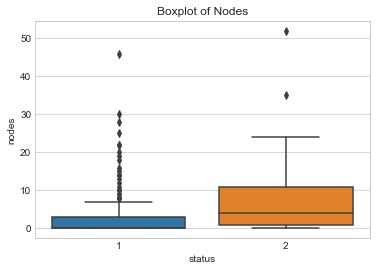

In [150]:
#Node Boxplot 
g=sns.boxplot(x='status',y='nodes', data=df)
g.set_title("Boxplot of Nodes")

plt.show()

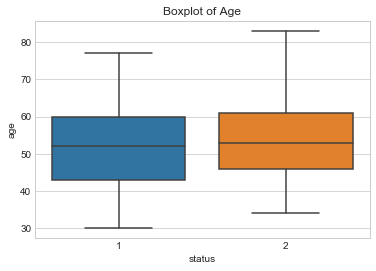

In [151]:
# Age Boxplot
g=sns.boxplot(x='status',y='age', data=df)
g.set_title("Boxplot of Age")

plt.show()

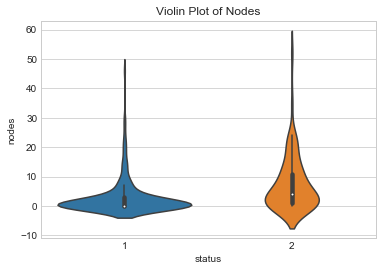

In [152]:
#Violin plots of nodes 
sns.violinplot(x="status", y="nodes", data=df, size=8).set_title("Violin Plot of Nodes")
plt.show()

In [153]:
#Verification of violin plot interpretation. Out of 225 survived, 165 patients have upto 2 nodes
df[(df['nodes'] <=2) & (df['status'] == 1)].head(5)

,age,year,nodes,status
0,30,64,1,1
2,30,65,0,1
3,31,59,2,1
6,33,60,0,1
10,34,60,1,1


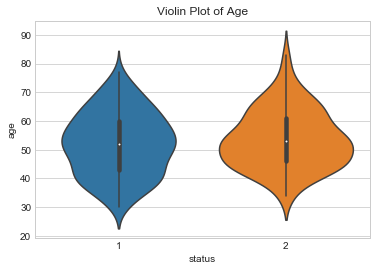

In [154]:
#Violon Plots of age
sns.violinplot(x="status", y="age", data=df, size=8).set_title("Violin Plot of Age")
plt.show()

In [155]:
#Verfication of Violin plot of age
df[(df['age'] >= 35) & (df['age'] <55)& (df['status'] == 1)].head(5)

,age,year,nodes,status
14,35,64,13,1
15,35,63,0,1
16,36,60,1,1
17,36,69,0,1
18,37,60,0,1


Conclusion: <br>
1.There are 306 records and 4 columns (3 features and 1 label).<br>
<br>
2.If we look at the mean and median of nodes and age then we can say that there can be noisy values of nodes because there is no difference in the median and mean of Age but there is a huge difference between mean and median of nodes. Mean is 4 times more than the median.There is possibility that data has many outliers in nodes.<br>
<br>
3.25% of the patients are less than 44 years old,50% of the patients less than 52 years old, 75% of the patients are less than 60.75 old 4.25% of the patients have less than or equal to 0 nodes, 50% of the patients have <= to 1 node, 75% of the patients have <=4 nodes. <br>
<br>
5.There are 225 patients survived 5 years or longer and 81 patients died within 5 years. <br>
<br>
6.2D scatter plot showing node vs age shows that there is no relation between nodes and age. Number of nodes can be high for younger patients. <br>
<br>
7.We can not conclude that for a given number of nodes, if the year of surgery is more (probably showing better technology)survival rate is better. For example, for zero or less number of nodes,there are orange dots in each year.<br><br>
8.If we look at Status vs Age, Status vs Year and Status vs Nodes plots, we can interprete that there is no clear relation between survival and Age, survival and Year, Survival and Nodes because in these three plots orange and blue points are overalapping.One more observation is if we look at the Histogram of age, we see better 5 year survival for younger patients i.e. approximately patients below 35 but the survival rate are also better in older patients i.e.65 to 75 age group. 
<br><br>
9.One important observation is that there are 19 patients having zero nodes but still status is 2. Need to explore this from domain perspective because node means lymph nodes which have been detected positive for cancer. If the patient is not surviving after 5 years even if they dont have any cencerous lymph node then this needs to be examined from domain perspective. <br><br>
10.PDF of nodes based on status shows that thre is no definite conclusion or threshold value of nodes that can be decided in order to decide the 5 year survival. This is because blue and orange plots are overlapping. One observation from the PDF is that for zero number of nodes the 5 year survibal proportion is more than 5 year mortality proportion. <br><br>
11.Overall, node in itself may not be a decisive factor in deciding 5 year survival. However if we look at the age pdf then we can say that node is slightly better variable to predict 5 year survival compared to age. This is because PDF of age based on status is more overallped than the PDF of nodes. <br><br>
12.PDF of age based on status shows that the there does not exist any threshold to conculde that patients below certain age will survive for 5 or more years or not. However we can see that patients below age of 35 have slightly better chances of survival.However this has to be checked by taking into consideration the impact of number of nodes. <br><br>
13.Nodes Boxplot shows that patients who survived for 5 year or longer have low number of positive nodes but there is an overlap between blue and orange boxes. Blue box is overalapping with the 25th to 50th percentile of orange box.If we try to find out any threshold value of nodes then this overalp can lead to wrong prediction. It also shows that nodes have significant number of outliers. <br><br>
14.Age boxplot shows that the two boxes are very similar which means that that it almost impossible to have any age threshold which can predict whether the patient is going to survive for 5 years or longer or not. However the patients who have survived tend to be smaller in age which means younger patinets have slightly more chance of 5 or more years of survival. <br><br>
15.Violin plots of nodes shows that for most of the patients who survived for 5 or more years typically have 0 to 2 nodes patients who did not survived for 5 or more years typically have 1 to 4 nodes. This was verified by querying the data in addition to Violin plots. <br><br>
16.Violin plots of age shows that for most of the patients who survived for 5 or more years typically in the age group of 35 to 55 years and patients who did not survived for 5 or more years are in the age group 40 to 55 years. This was verified by querying the data in addition to Violin plots. <br><br>
17.CDF shows that around 98% of the records have approximately 25 or less number of nodes. CDF also shows that 100% of the records have nodes approximately less than equal to 55. <br><br>
18.PDF has highly right skewed distribution and around 80% of the records have approximately 5 or less number of nodes.<br><br>